In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import lib_read_HiPSTAR as rf
import lib_VTK as vtk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
U_ratio = 339.926245456/60.21
print U_ratio
rat = U_ratio**2.0

5.64567755283


In [4]:
rans_baseline = np.loadtxt('wake-rs/wake-baseline.txt')
print rans_baseline.shape
print rans_baseline[0,0],rans_baseline[-1,0]

(160, 7)
-1.77850676 -0.21831913


In [32]:
rans_inloop = np.loadtxt('wake-rs/wake-inloop.txt')
print rans_inloop.shape
print rans_inloop[0,0],rans_inloop[-1,0]

(160, 7)
-1.77850676 -0.21831913


In [5]:
rans_aij = np.loadtxt('wake-rs/wake.txt')
print rans_aij.shape
print rans_aij[0,0],rans_aij[-1,0]

(160, 7)
-1.77850676 -0.21831913


In [6]:
# read hipstar data into vtk object, need to output data into .vtk by paraview first!
hip_vtk = vtk.read_VTK_dataset('vtk/LS5TI5.vtk')

In [7]:
#list the vars to be outputed
nvar_source = hip_vtk.GetPointData().GetNumberOfArrays()
print nvar_source
var_list = []
for i in range(nvar_source):
    temp_var = hip_vtk.GetPointData().GetArrayName(i)
#    print i,temp_var
    var_list.append(temp_var)
#lines = [line.rstrip('\n') for line in open('vtk/header.txt')]
#print lines
print var_list

7
['$ \\overline{\\rho}$', '$ \\tau_{11}$', '$ \\tau_{12}$', '$ \\tau_{13}$', '$ \\tau_{22}$', '$ \\tau_{23}$', '$ \\tau_{33}$']


In [11]:
ny = rans_aij.shape[0]
x1 = 1.15
y1 = -1.77850676
x2 = 1.15
y2 = -0.21831913
x_line1 = np.linspace(x1, x2 ,num=ny)
y_line1 = rans_aij[:,0]
print x_line1.shape
z = 0.0

(160,)


In [12]:
HiP_stress_line1 = []
for i in range(len(x_line1)):
    pt = [x_line1[i],y_line1[i],z]
    _, data = vtk.extract_VTK_point(hip_vtk,pt)

    # Hipstar uses negative stress convention
    rho = data[0][1][0][0]
    Rxx = data[1][1][0][0]*rho/rat
    Rxy = -data[2][1][0][0]*rho/rat # '-' for flapping between traf
    Ryy = data[4][1][0][0]*rho/rat
    Rzz = data[6][1][0][0]*rho/rat
    
    tke = -0.5*(Rxx + Ryy + Rzz)
    #print tke

    HiP_stress_line1.append(np.asarray([Rxx+2.0/3.0*tke,Rxy,Ryy+2.0/3.0*tke]))

In [13]:
HiP_stress_line1 = np.asarray(HiP_stress_line1)
print HiP_stress_line1.shape

(160, 3)


In [14]:
x1 = 1.25
y1 = -1.77850676
x2 = 1.25
y2 = -0.21831913
x_line2 = np.linspace(x1, x2, num=ny)
y_line2 = y_line1
z = 0.0

In [15]:
HiP_stress_line2 = []
for i in range(len(x_line2)):
    pt = [x_line2[i],y_line2[i],z]
    _, data = vtk.extract_VTK_point(hip_vtk,pt)

    # Hipstar uses negative stress convention
    rho = data[0][1][0][0]
    Rxx = data[1][1][0][0]*rho/rat
    Rxy = -data[2][1][0][0]*rho/rat # '-' for flapping between traf
    Ryy = data[4][1][0][0]*rho/rat
    Rzz = data[6][1][0][0]*rho/rat
    
    tke = -0.5*(Rxx + Ryy + Rzz)
    #print tke

    HiP_stress_line2.append(np.asarray([Rxx+2.0/3.0*tke,Rxy,Ryy+2.0/3.0*tke]))

In [16]:
HiP_stress_line2 = np.asarray(HiP_stress_line2)
print HiP_stress_line2.shape

(160, 3)


<IPython.core.display.Javascript object>


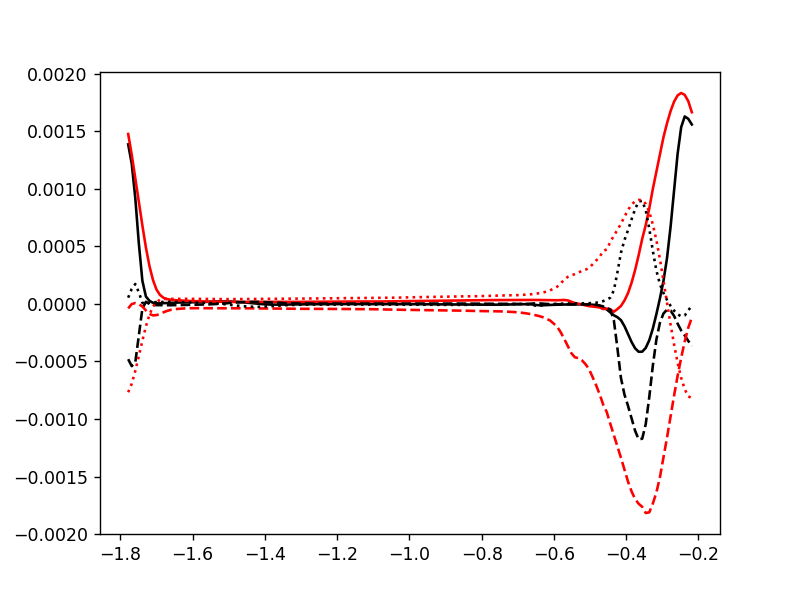

/home/yaomin/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [19]:
plt.figure()
#plt.axes(aspect='equal')
plt.plot(rans_aij[:,0],rans_aij[:,2],'k-')
plt.plot(y_line1, HiP_stress_line1[:,1],'r-')
plt.plot(rans_aij[:,0],rans_aij[:,1],'k--')
plt.plot(y_line1, HiP_stress_line1[:,0],'r--')
plt.plot(rans_aij[:,0],rans_aij[:,3],'k:')
plt.plot(y_line1, HiP_stress_line1[:,2],'r:')
plt.legend(frameon=False,fontsize=12)
#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


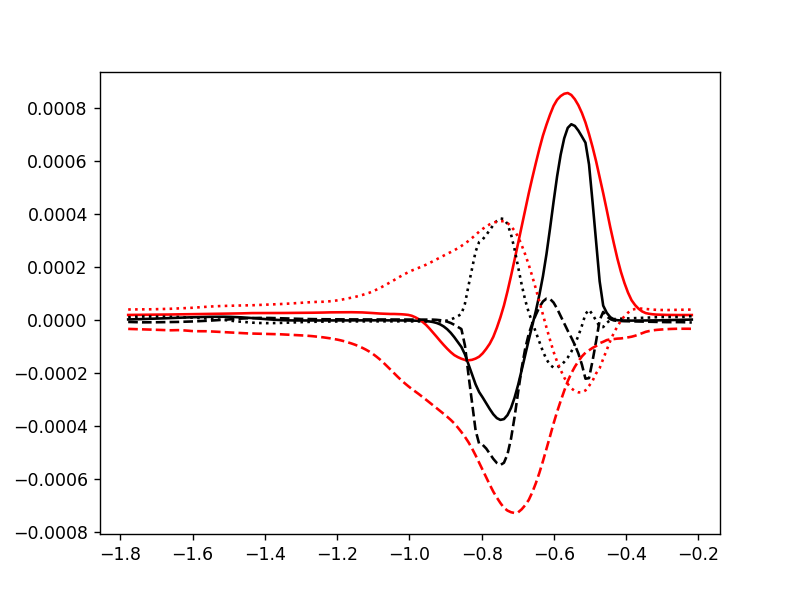

In [20]:
plt.figure()
#plt.axes(aspect='equal')
plt.plot(rans_aij[:,0],rans_aij[:,5],'k-')
plt.plot(y_line2, HiP_stress_line2[:,1],'r-')
plt.plot(rans_aij[:,0],rans_aij[:,4],'k--')
plt.plot(y_line2, HiP_stress_line2[:,0],'r--')
plt.plot(rans_aij[:,0],rans_aij[:,6],'k:')
plt.plot(y_line2, HiP_stress_line2[:,2],'r:')
plt.legend(frameon=False,fontsize=12)
#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


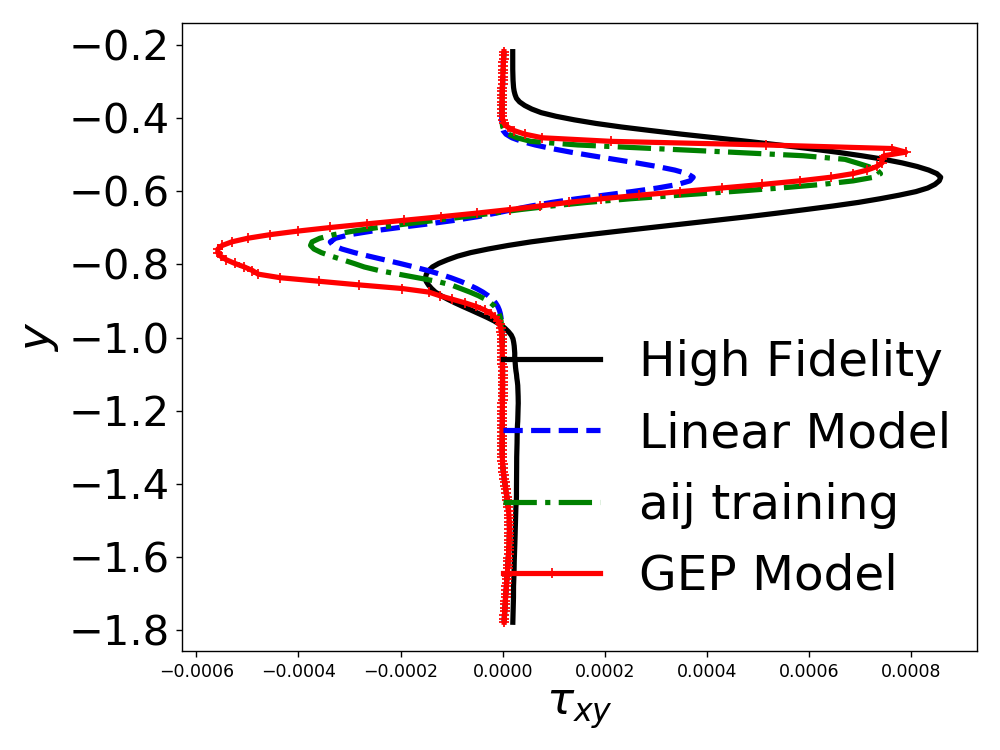

In [37]:
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8,6))
#plt.axes(aspect='equal')
plt.plot( HiP_stress_line2[:,1],y_line2,'k-',linewidth=3,label='High Fidelity')
plt.plot(rans_baseline[:,5],rans_baseline[:,0],'b--',linewidth=3,label='Linear Model')
plt.plot(rans_aij[:,5],rans_aij[:,0],'g-.',linewidth=3,label='aij training')
plt.plot(rans_inloop[:,5],rans_inloop[:,0],'r-+',linewidth=3,label='GEP Model')
plt.xlabel(r'$\tau_{xy}$',fontsize=26,**csfont)
plt.ylabel(r'$y$',fontsize=26,**csfont)
plt.yticks(fontsize=24,**csfont)
#plt.xticks(np.arange(-0.04, 0.08, 0.04),fontsize=24,**csfont)
#plt.ylim([0.0,1.0])
#plt.xlim([-0.04,0.08])
plt.legend(loc=(0.38,0.05),fontsize=28,frameon=False)
#plt.text(-0.08,1.08,'(a)',fontsize=28,**csfont)
#plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig('wake-rs//axy.png',dpi=400)

<IPython.core.display.Javascript object>


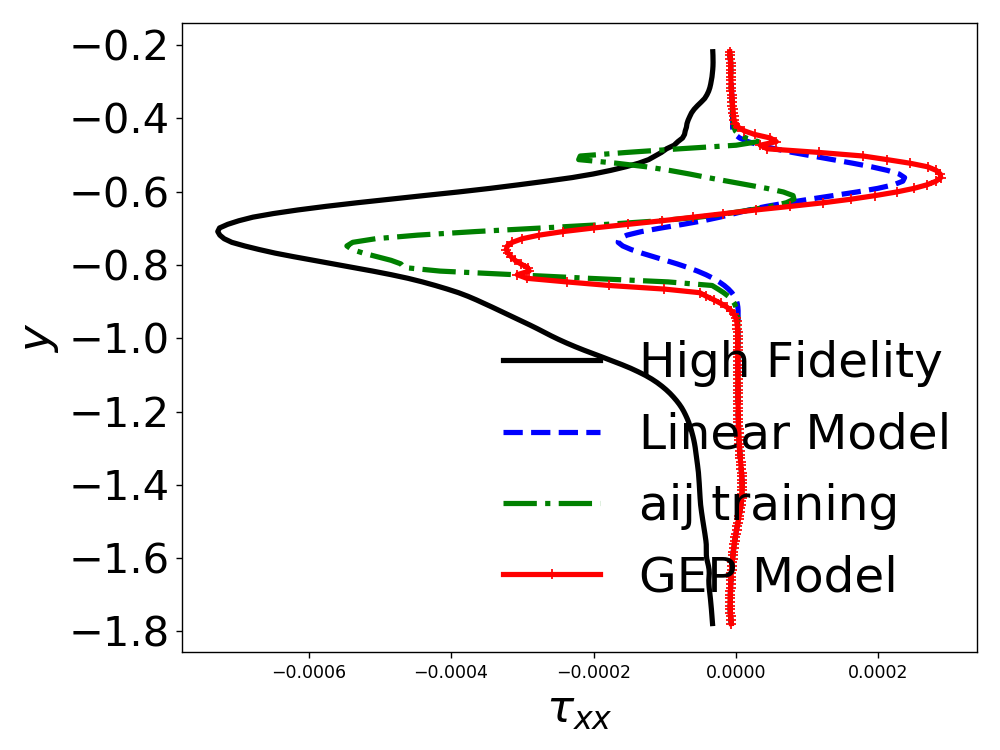

In [38]:
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8,6))
#plt.axes(aspect='equal')
plt.plot( HiP_stress_line2[:,0],y_line2,'k-',linewidth=3,label='High Fidelity')
plt.plot(rans_baseline[:,4],rans_baseline[:,0],'b--',linewidth=3,label='Linear Model')
plt.plot(rans_aij[:,4],rans_aij[:,0],'g-.',linewidth=3,label='aij training')
plt.plot(rans_inloop[:,4],rans_inloop[:,0],'r-+',linewidth=3,label='GEP Model')
plt.xlabel(r'$\tau_{xx}$',fontsize=26,**csfont)
plt.ylabel(r'$y$',fontsize=26,**csfont)
plt.yticks(fontsize=24,**csfont)
#plt.xticks(np.arange(-0.04, 0.08, 0.04),fontsize=24,**csfont)
#plt.ylim([0.0,1.0])
#plt.xlim([-0.04,0.08])
plt.legend(loc=(0.38,0.05),fontsize=28,frameon=False)
#plt.text(-0.08,1.08,'(a)',fontsize=28,**csfont)
#plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig('wake-rs//axx.png',dpi=400)

<IPython.core.display.Javascript object>


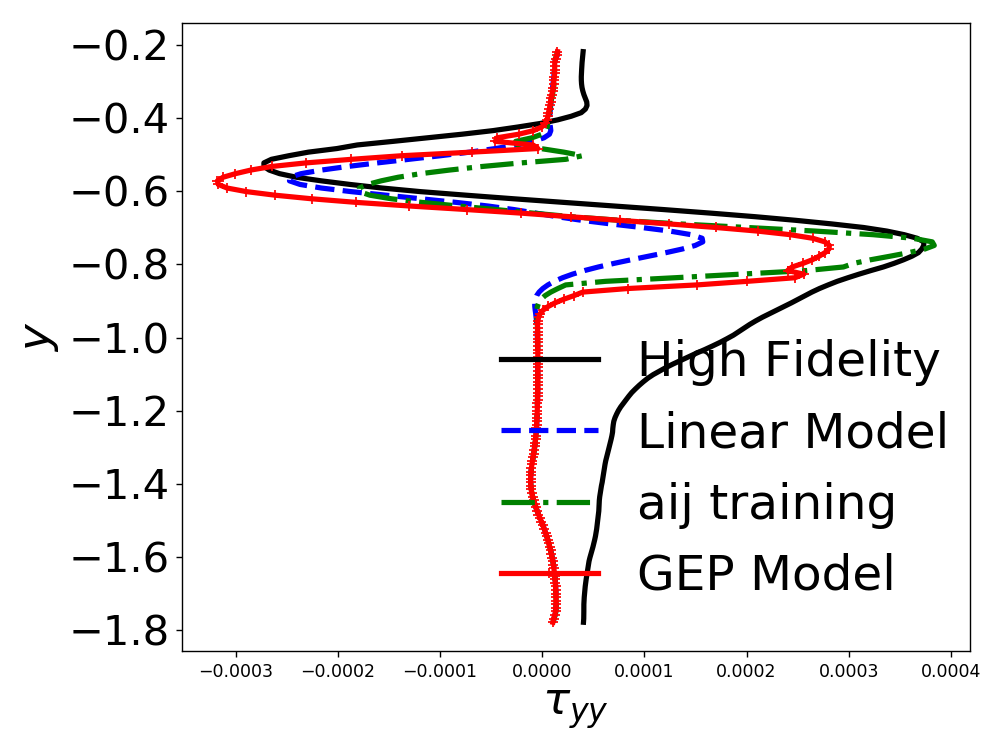

In [40]:
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8,6))
#plt.axes(aspect='equal')
plt.plot( HiP_stress_line2[:,2],y_line2,'k-',linewidth=3,label='High Fidelity')
plt.plot(rans_baseline[:,6],rans_baseline[:,0],'b--',linewidth=3,label='Linear Model')
plt.plot(rans_aij[:,6],rans_aij[:,0],'g-.',linewidth=3,label='aij training')
plt.plot(rans_inloop[:,6],rans_inloop[:,0],'r-+',linewidth=3,label='GEP Model')
plt.xlabel(r'$\tau_{yy}$',fontsize=26,**csfont)
plt.ylabel(r'$y$',fontsize=26,**csfont)
plt.yticks(fontsize=24,**csfont)
#plt.xticks(np.arange(-0.04, 0.08, 0.04),fontsize=24,**csfont)
#plt.ylim([0.0,1.0])
#plt.xlim([-0.04,0.08])
plt.legend(loc=(0.38,0.05),fontsize=28,frameon=False)
#plt.text(-0.08,1.08,'(a)',fontsize=28,**csfont)
#plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig('wake-rs//ayy.png',dpi=400)

In [16]:
ofile=open('./wake-rs/HiP_wake.dat','w')
for j in range(ny):
    ofile.write('%15.8f,%15.8f,%15.8f,%15.8f,%15.8f,%15.8f,%15.8f\n'%(y_line1[j],\
                HiP_stress_line1[j,0],HiP_stress_line1[j,1],HiP_stress_line1[j,2],\
                HiP_stress_line2[j,0],HiP_stress_line2[j,1],HiP_stress_line2[j,2]))
ofile.close()